### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [36]:
# Download this file 
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

<h2 id="reading_data">Reading the data in adnd Data exploration </h2>

In [5]:
import os 
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")

<h2 id="exploratory_analysis">Exploratory data analysis </h2>

In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

Lets select some features to explore more.


we can plot each of these features:


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


Coefficients:  [[39.37738596]]
Intercept:  [124.26060702]
Mean absolute error: 23.21
Residual sum of squares (MSE): 915.04
R2-score: 0.71


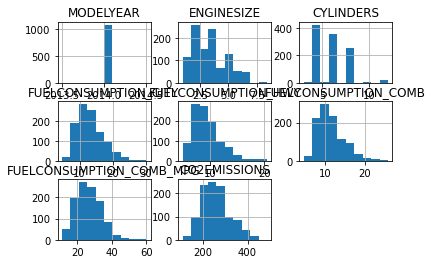

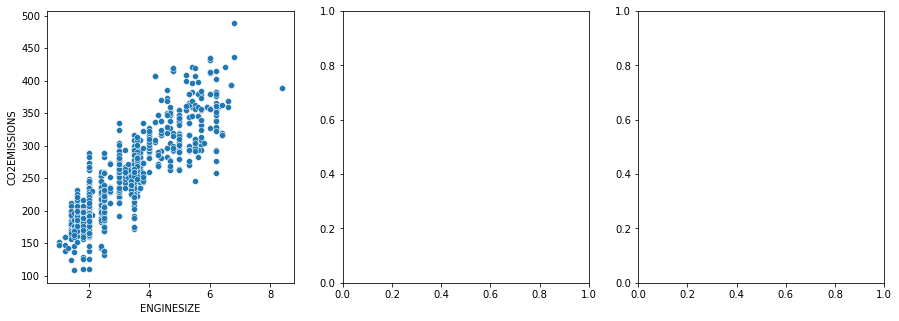

In [28]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()

# Describe independent and dependent variables
ind = ['ENGINESIZE']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])

        
        
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])



# Fit the model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = regr.predict(test_x)



# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="multiple_regression">Multiple Regression Model</h2>

Coefficients:  [[11.07842874  6.99983159  9.90802751]]
Intercept:  [64.09469306]
Mean absolute error: 19.67
Residual sum of squares (MSE): 694.43
R2-score: 0.81


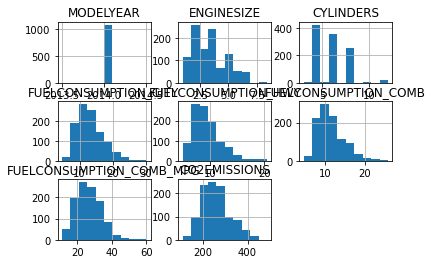

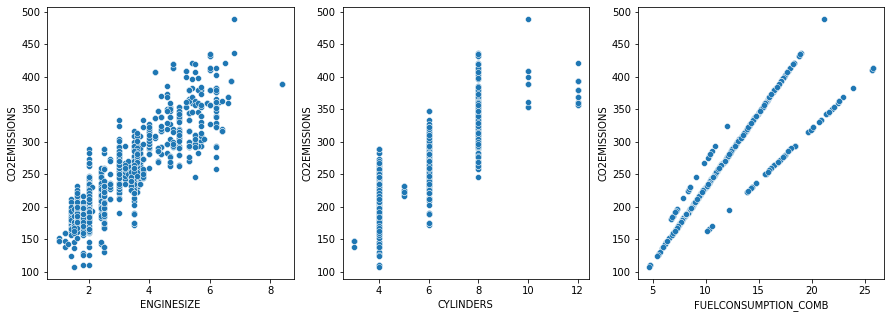

In [29]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()


# Describe independent and dependent variables
ind = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])

        
        
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# Fit the model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = regr.predict(test_x)



# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )